In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [52]:
df=pd.read_csv("/content/Horse Colic database.csv",header=None)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [54]:
column_names=["surgery", "age", "hospital_number", "rectal_temperature", "pulse", "respiratory_rate",
    "extremity_temperature", "peripheral_pulse", "mucous_membranes", "capillary_refill_time",
    "pain_level", "peristalsis", "abdominal_distension", "nasogastric_tube", "nasogastric_reflux",
    "nasogastric_reflux_ph", "rectal_exam_feces", "abdomen", "packed_cell_volume", "total_protein",
    "abdominocentesis_appearance", "abdominocentesis_total_protein", "outcome", "surgical_lesion",
    "lesion_site", "lesion_type", "lesion_subtype", "cp_data"]

#Rename column name

In [55]:
df.columns=column_names

In [56]:
 df.head()

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,extremity_temperature,peripheral_pulse,mucous_membranes,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdominocentesis_total_protein,outcome,surgical_lesion,lesion_site,lesion_type,lesion_subtype,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [57]:
#check the sjhape of dataset
df.shape

(300, 28)

In [58]:
# Checking for any columns that contain the "?" mark, which represents missing data
missing_data_columns = df.apply(lambda col: col.astype(str).str.contains("\?").any())

# Displaying columns that contain missing data
missing_data_columns[missing_data_columns == True]


,0
surgery,True
rectal_temperature,True
pulse,True
respiratory_rate,True
extremity_temperature,True
peripheral_pulse,True
mucous_membranes,True
capillary_refill_time,True
pain_level,True
peristalsis,True


In [59]:
# Replace "?" with NaN in the DataFrame
df.replace("?", np.nan, inplace=True)

In [60]:
#check the null values in column
df.isnull().sum()

,0
surgery,1
age,0
hospital_number,0
rectal_temperature,60
pulse,24
respiratory_rate,58
extremity_temperature,56
peripheral_pulse,69
mucous_membranes,47
capillary_refill_time,32


In [61]:
#replacing the null values with the mode values all column using for loop
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [62]:
#check the null values
df.isnull().sum().any()

False

In [63]:
# Assuming `df` is your DataFrame
for col in df.select_dtypes(include='object').columns:
    try:
        # Attempt to convert to integer
        df[col] = df[col].astype(int)
    except ValueError:
        # If it fails, convert to float
        df[col] = df[col].astype(float)

In [64]:
#check the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   surgery                         300 non-null    int64  
 1   age                             300 non-null    int64  
 2   hospital_number                 300 non-null    int64  
 3   rectal_temperature              300 non-null    float64
 4   pulse                           300 non-null    int64  
 5   respiratory_rate                300 non-null    int64  
 6   extremity_temperature           300 non-null    int64  
 7   peripheral_pulse                300 non-null    int64  
 8   mucous_membranes                300 non-null    int64  
 9   capillary_refill_time           300 non-null    int64  
 10  pain_level                      300 non-null    int64  
 11  peristalsis                     300 non-null    int64  
 12  abdominal_distension            300 

In [65]:
# Define the mapping for each column
mappings = {
    'surgery': {1: 'Surgery', 2: 'No surgery'},
    'age': {1: 'Adult horse', 2: 'Young'},
    'peripheral_pulse': {1: 'Normal', 2: 'Increased', 3: 'Reduced', 4: 'Absent'},
    'mucous_membranes': {1: 'Normal pink', 2: 'Bright pink', 3: 'Pale pink', 4: 'Pale cyanotic', 5: 'Bright red / injected', 6: 'Dark cyanotic'},
    'capillary_refill_time': {1: '< 3 seconds', 2: '>= 3 seconds'},
    'pain_level': {1: 'Alert, no pain', 2: 'Depressed', 3: 'Intermittent mild pain', 4: 'Intermittent severe pain', 5: 'Continuous severe pain'},
    'peristalsis': {1: 'Hypermotile', 2: 'Normal', 3: 'Hypomotile', 4: 'Absent'},
    'abdominal_distension': {1: 'None', 2: 'Slight', 3: 'Moderate', 4: 'Severe'},
    'nasogastric_tube': {1: 'None', 2: 'Slight', 3: 'Significant'},
    'nasogastric_reflux': {1: 'None', 2: '> 1 liter', 3: '< 1 liter'},
    'rectal_exam_feces': {1: 'Normal', 2: 'Increased', 3: 'Decreased', 4: 'Absent'},
    'abdomen': {1: 'Normal', 2: 'Other', 3: 'Firm feces in the large intestine', 4: 'Distended small intestine', 5: 'Distended large intestine'},
    'abdominocentesis_appearance': {1: 'Clear', 2: 'Cloudy', 3: 'Serosanguinous'},
    'outcome': {1: 'Lived', 2: 'Died', 3: 'Was euthanized'},
    'surgical_lesion': {1: 'Yes', 2: 'No'},
    'cp_data': {1: 'Pathology data present', 2: 'No pathology data'}
}

In [66]:
# Assuming 'df' is your DataFrame
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

In [67]:
df

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,extremity_temperature,peripheral_pulse,mucous_membranes,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdominocentesis_total_protein,outcome,surgical_lesion,lesion_site,lesion_type,lesion_subtype,cp_data
0,No surgery,Adult horse,530101,38.5,66,28,3,Reduced,Normal pink,>= 3 seconds,...,45.0,8.4,Cloudy,2.0,Died,No,11300,0,0,No pathology data
1,Surgery,Adult horse,534817,39.2,88,20,3,Normal,Pale cyanotic,< 3 seconds,...,50.0,85.0,Cloudy,2.0,Was euthanized,No,2208,0,0,No pathology data
2,No surgery,Adult horse,530334,38.3,40,24,1,Normal,Pale pink,< 3 seconds,...,33.0,6.7,Cloudy,2.0,Lived,No,0,0,0,Pathology data present
3,Surgery,NaN,5290409,39.1,164,84,4,Normal,Dark cyanotic,>= 3 seconds,...,48.0,7.2,Serosanguinous,5.3,Died,Yes,2208,0,0,Pathology data present
4,No surgery,Adult horse,530255,37.3,104,35,3,Normal,Dark cyanotic,>= 3 seconds,...,74.0,7.4,Cloudy,2.0,Died,No,4300,0,0,No pathology data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Surgery,Adult horse,533886,38.0,120,70,4,Normal,Pale cyanotic,>= 3 seconds,...,55.0,65.0,Cloudy,2.0,Was euthanized,No,3205,0,0,No pathology data
296,No surgery,Adult horse,527702,37.2,72,24,3,Increased,Pale cyanotic,>= 3 seconds,...,44.0,6.5,Serosanguinous,3.3,Was euthanized,Yes,2208,0,0,Pathology data present
297,Surgery,Adult horse,529386,37.5,72,30,4,Reduced,Pale cyanotic,< 3 seconds,...,60.0,6.8,Cloudy,2.0,Died,Yes,3205,0,0,No pathology data
298,Surgery,Adult horse,530612,36.5,100,24,3,Reduced,Pale pink,< 3 seconds,...,50.0,6.0,Serosanguinous,3.4,Lived,Yes,2208,0,0,Pathology data present


#EDA(Explotary Data Analysis):-

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   surgery                         300 non-null    object 
 1   age                             300 non-null    object 
 2   hospital_number                 300 non-null    int64  
 3   rectal_temperature              300 non-null    float64
 4   pulse                           300 non-null    int64  
 5   respiratory_rate                300 non-null    int64  
 6   extremity_temperature           300 non-null    int64  
 7   peripheral_pulse                300 non-null    object 
 8   mucous_membranes                300 non-null    object 
 9   capillary_refill_time           298 non-null    object 
 10  pain_level                      300 non-null    object 
 11  peristalsis                     300 non-null    object 
 12  abdominal_distension            300 

In [72]:
df['age'].unique()

array(['Adult horse', 'Young'], dtype=object)

In [71]:
#replace null value in age in young
df['age'].fillna('Young',inplace=True)

In [74]:
df['capillary_refill_time'].unique()

array(['>= 3 seconds', '< 3 seconds', nan], dtype=object)

In [75]:
#replace the null values in <3 second
df['capillary_refill_time'].fillna('< 3 seconds',inplace=True)

In [76]:
#check the null values
df.isnull().sum().any()

False

In [77]:
#save dataset
df.to_csv('horse_holic_with_column_name.csv')

#Data Visualize

In [81]:
#check the categorical column
categorical_columns = df.select_dtypes(include=['object']).columns

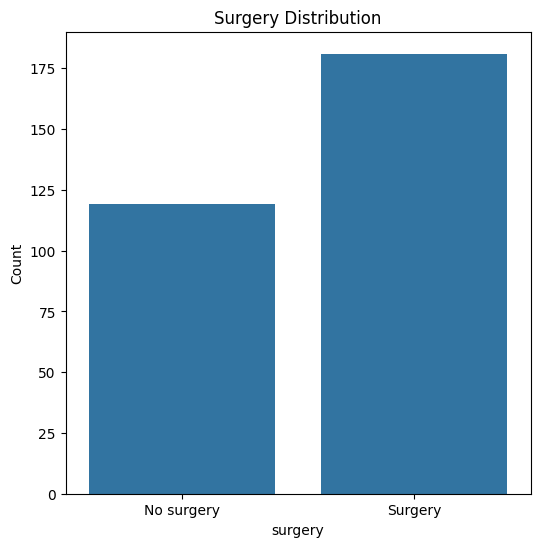

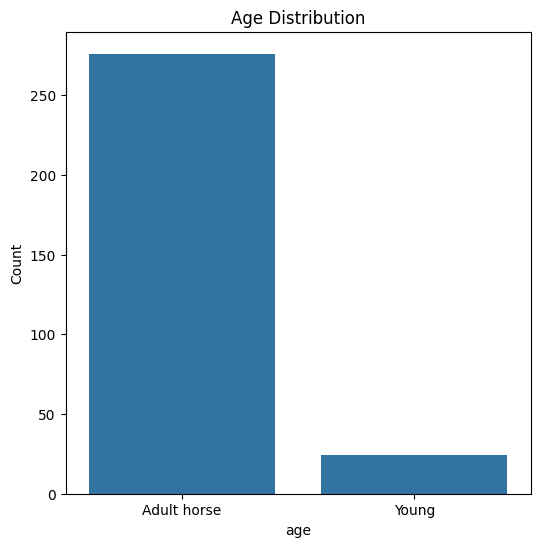

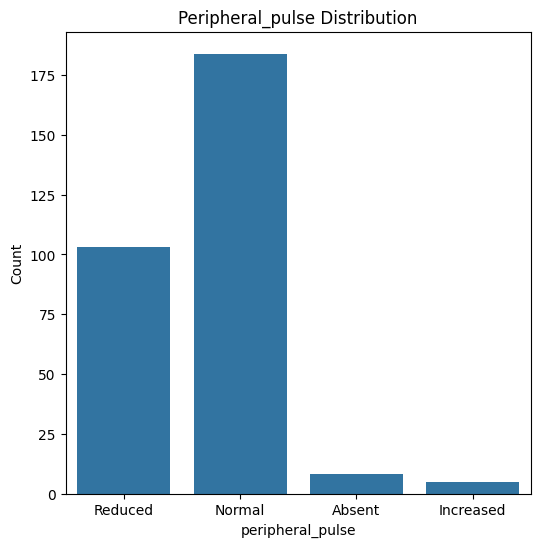

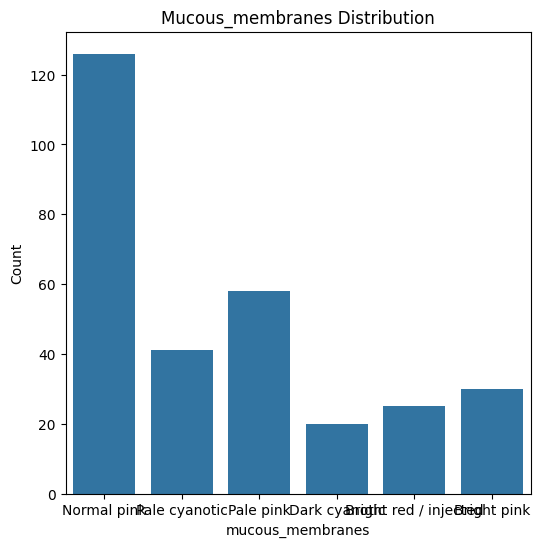

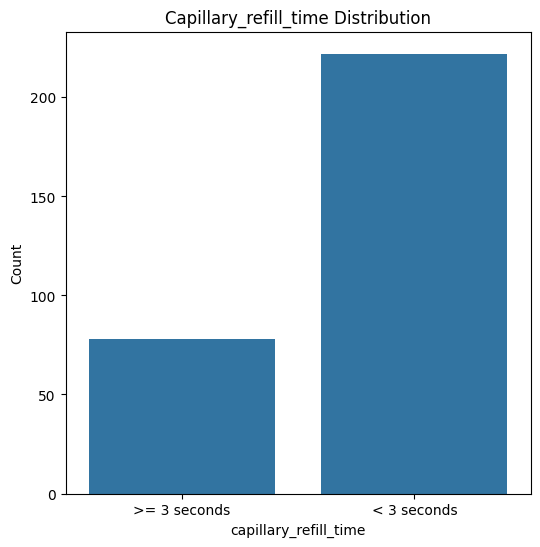

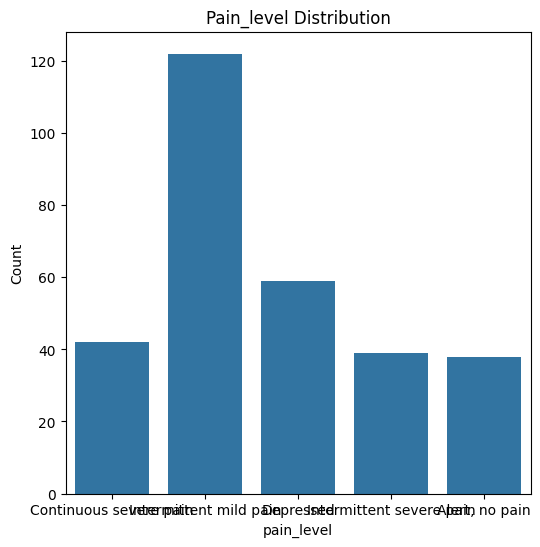

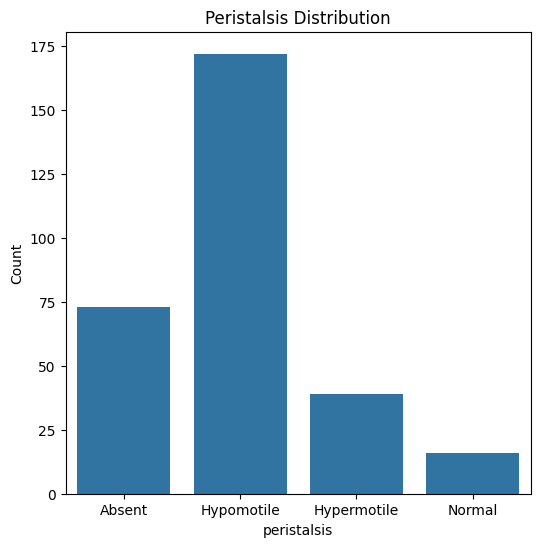

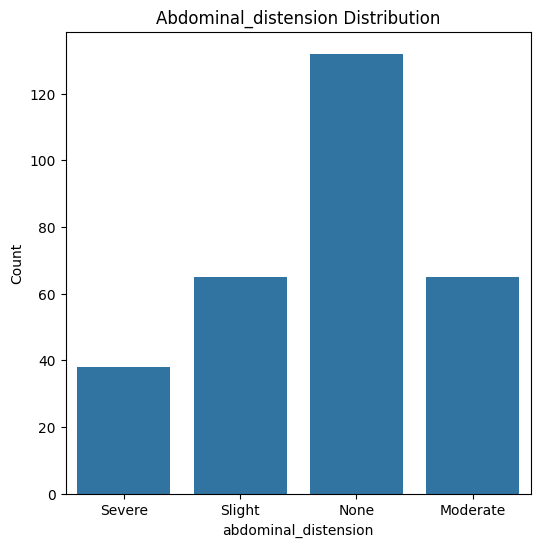

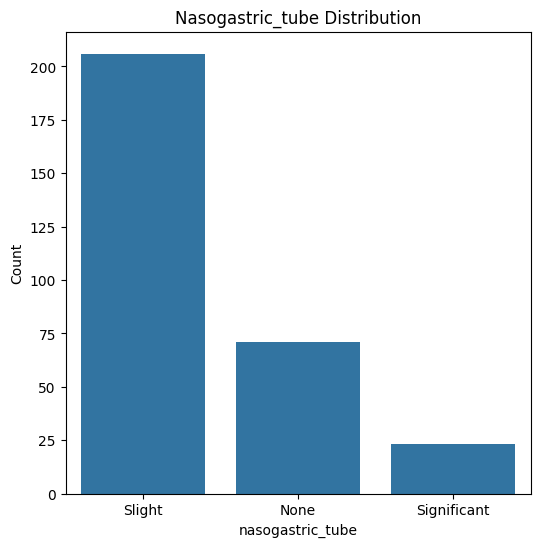

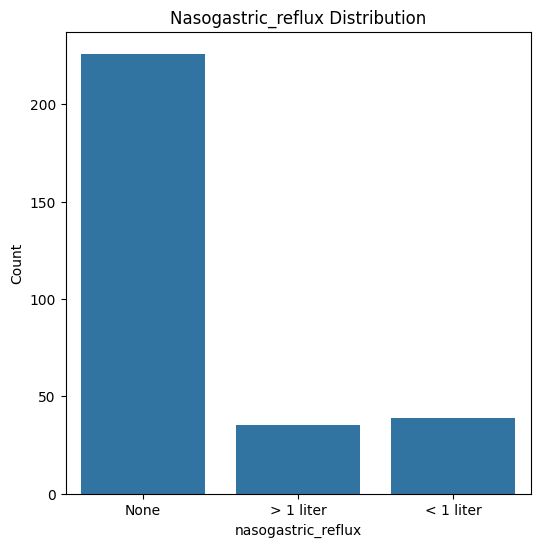

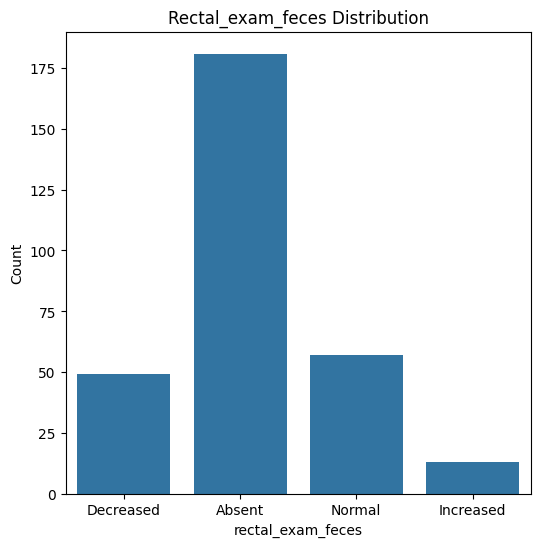

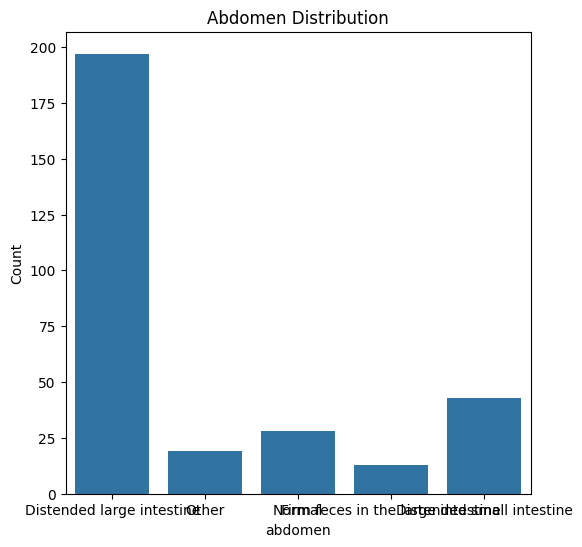

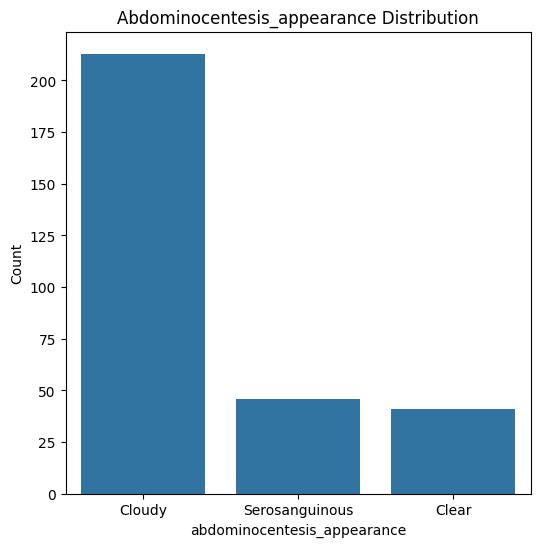

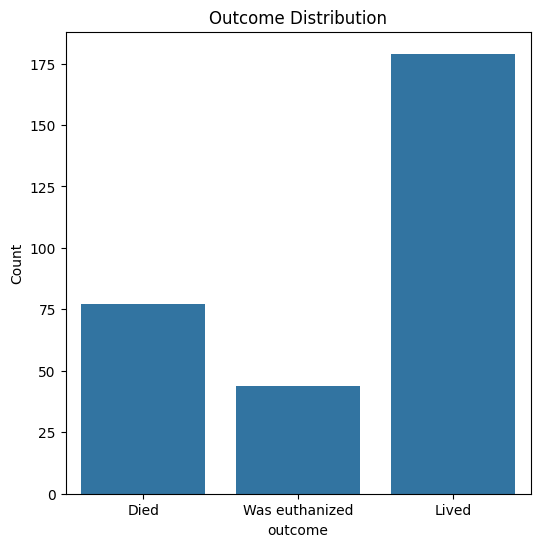

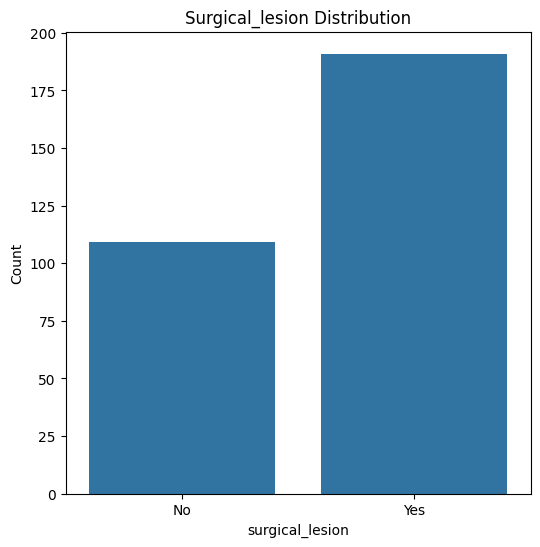

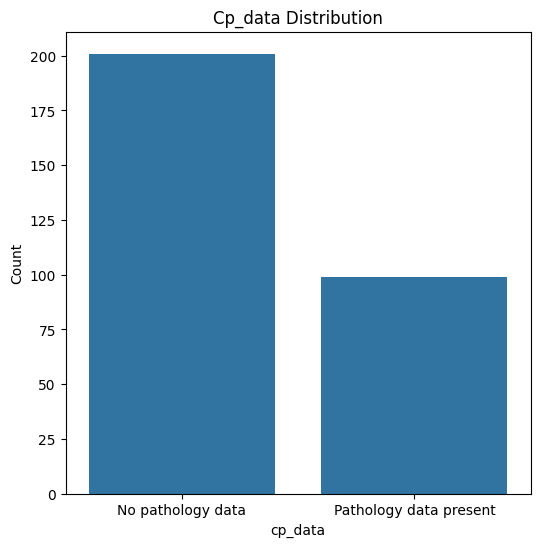

In [82]:
#bar chart the categorical data
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [86]:
#numerical dataset
numerical_columns=df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['hospital_number', 'rectal_temperature', 'pulse', 'respiratory_rate',
       'extremity_temperature', 'nasogastric_reflux_ph', 'packed_cell_volume',
       'total_protein', 'abdominocentesis_total_protein', 'lesion_site',
       'lesion_type', 'lesion_subtype'],
      dtype='object')

In [88]:
correlation_matrix = df[numerical_columns].corr()

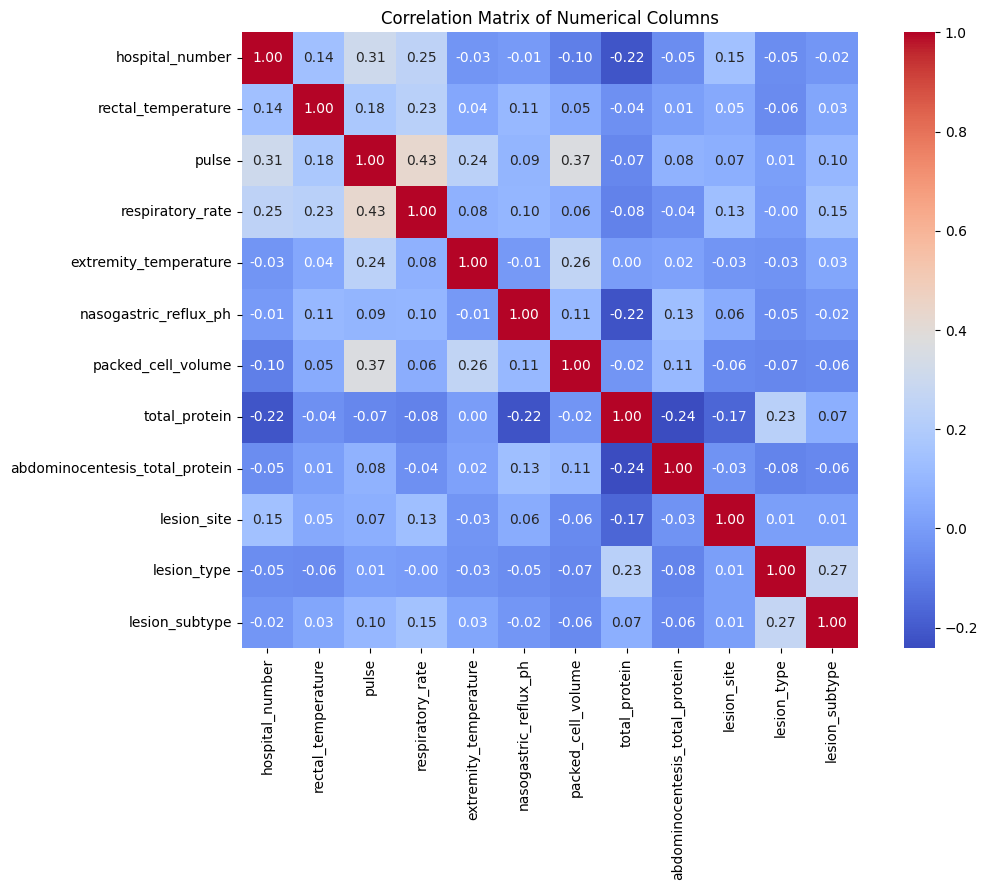

In [89]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Columns")
plt.show()
